# Task 1 :  Titanic Survival Prediction 
# Author:  Kirti Gupta
# Batch :  April 2024

**Task : TITANIC SURVIVAL PREDICTION**

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

# **Data Description**

**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* **Sibling**= brother, sister, stepbrother, stepsister
* **Spouse** = husband, wife (mistresses and fiancés were ignored)
**parch**: The dataset defines family relations in this way...
* **Parent** = mother, father
* **Child** = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

# **Importing dataset and libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **DATA**

In [3]:
data=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data['Cabin'].isnull().sum()/data.shape[0]

0.7710437710437711

In [10]:
data=data.drop(['Cabin'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# **VISUALIZATION**

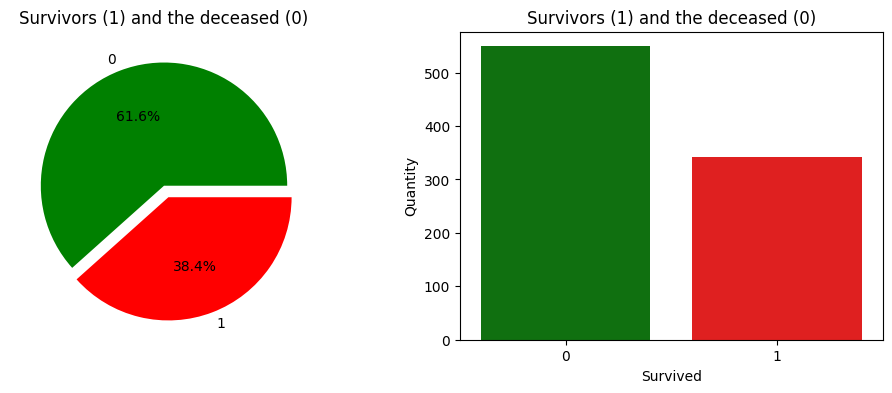

In [12]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart for Survived
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    colors=['green', 'red'],
    ax=axes[0],
    shadow=False)
axes[0].set_title('Survivors (1) and the deceased (0)')
axes[0].set_ylabel('')

# Count plot for Survived
sns.countplot(x='Survived', data=data, ax=axes[1], palette=['green', 'red'])  
axes[1].set_ylabel('Quantity')
axes[1].set_title('Survivors (1) and the deceased (0)')

# Show plot
plt.show()


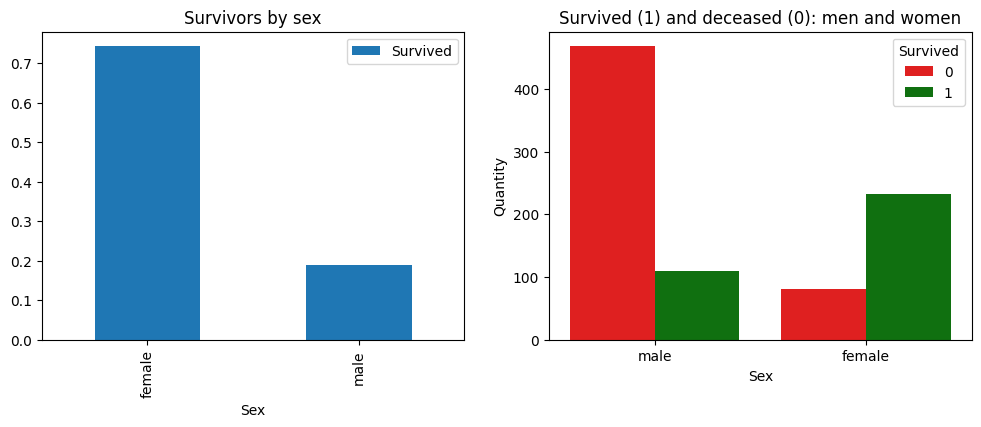

In [13]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart for Survivors by sex
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=axes[0]) 
axes[0].set_title('Survivors by sex') 

# Count plot for Sex with custom colors
sns.countplot(x='Sex', hue='Survived', data=data, ax=axes[1], palette={0: "red", 1: "green"}) 
axes[1].set_ylabel('Quantity') 
axes[1].set_title('Survived (1) and deceased (0): men and women') 

plt.show() 


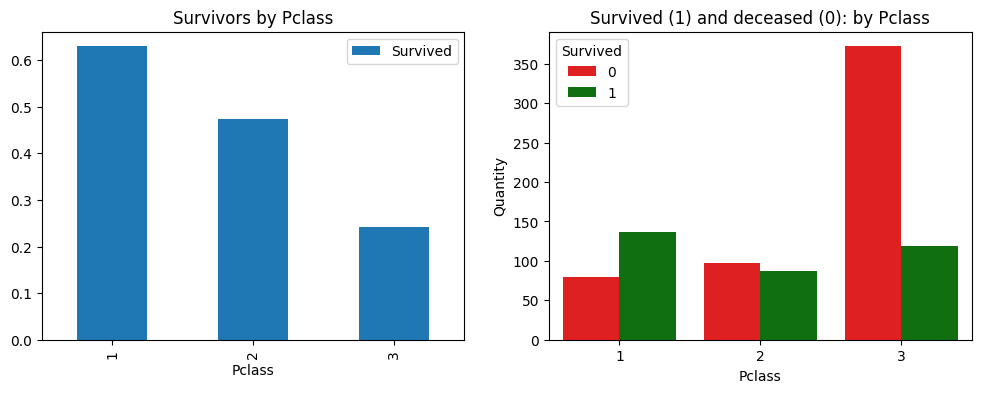

In [14]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart for Survivors by Pclass
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=axes[0]) 
axes[0].set_title('Survivors by Pclass') 

# Count plot for Pclass with custom colors
sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[1], palette={0: "red", 1: "green"}) 
axes[1].set_ylabel('Quantity') 
axes[1].set_title('Survived (1) and deceased (0): by Pclass') 

plt.show() 


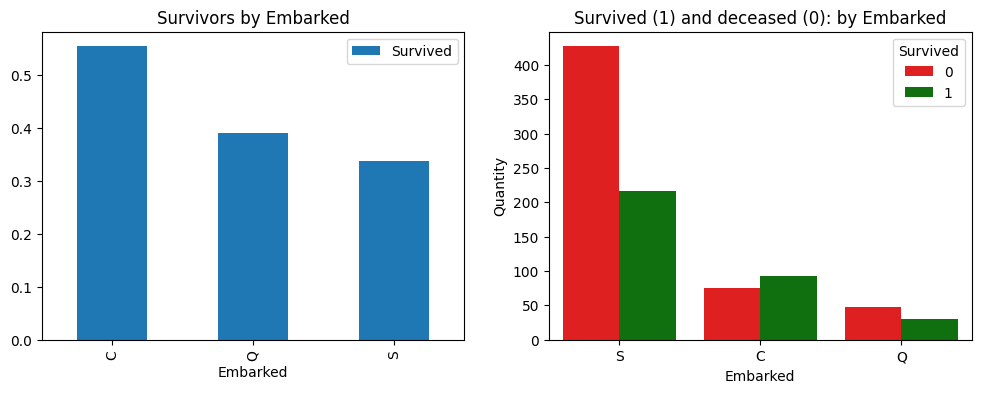

In [15]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart for Survivors by Embarked
data[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar(ax=axes[0]) 
axes[0].set_title('Survivors by Embarked') 

# Count plot for Embarked with custom colors
sns.countplot(x='Embarked', hue='Survived', data=data, ax=axes[1], palette={0: "red", 1: "green"}) 
axes[1].set_ylabel('Quantity') 
axes[1].set_title('Survived (1) and deceased (0): by Embarked') 

plt.show() 


# **FEATURE ENGINEERING**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
# Ticket consists of unique values and unlikely to provide any essential information 
data = data.drop(['Ticket'], axis=1)

In [18]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
# replacing the missing values in  
# the Embarked feature with S 
data = data.fillna({"Embarked": "S"}) 

In [20]:
# sort the ages into logical categories 
data["Age"] = data["Age"].fillna(-0.5) 

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 

labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
          'Student', 'Young Adult', 'Adult', 'Senior'] 

data['AgeGroup'] = pd.cut(data["Age"], bins, labels=labels) 

In [21]:
data['AgeGroup'].value_counts()

AgeGroup
Young Adult    220
Adult          195
Unknown        177
Student        138
Teenager        70
Baby            44
Child           25
Senior          22
Name: count, dtype: int64

In [22]:
# Extract a title for each Name in the 'data' dataset
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace various titles with more common names
data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Display the mean survival rate for each title
title_survival_rate = data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# Map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)


In [23]:
# Calculate the mode AgeGroup for each Title in the 'data' dataset
mr_age = data[data["Title"] == 1]["AgeGroup"].mode()[0]  # Young Adult
miss_age = data[data["Title"] == 2]["AgeGroup"].mode()[0]  # Student
mrs_age = data[data["Title"] == 3]["AgeGroup"].mode()[0]  # Adult
master_age = data[data["Title"] == 4]["AgeGroup"].mode()[0]  # Baby
royal_age = data[data["Title"] == 5]["AgeGroup"].mode()[0]  # Adult
rare_age = data[data["Title"] == 6]["AgeGroup"].mode()[0]  # Adult

# Create a mapping from Title to AgeGroup for each Title
age_title_mapping = {1: "Young Adult", 2: "Student", 
                     3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

"""# Replace 'Unknown' AgeGroup with the mode AgeGroup for each Title
for x in range(len(data["AgeGroup"])):
    if data["AgeGroup"][x] == "Unknown":
        data["AgeGroup"][x] = age_title_mapping[data["Title"][x]]"""

# Replace 'Unknown' AgeGroup with the mode AgeGroup for each Title using .loc
for x in range(len(data["AgeGroup"])):
    if data["AgeGroup"][x] == "Unknown":
        data.loc[x, "AgeGroup"] = age_title_mapping[data["Title"][x]]

In [24]:
# Map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
               'Student': 4, 'Young Adult': 5, 'Adult': 6,  
               'Senior': 7} 
data['AgeGroup'] = data['AgeGroup'].map(age_mapping) 

# Dropping the Age feature for now
data = data.drop(['Age'], axis=1)


In [25]:
data = data.drop(['Name'], axis=1)

In [26]:
sex_mapping = {"male": 0, "female": 1} 
data['Sex'] = data['Sex'].map(sex_mapping) 
  
embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
data['Embarked'] = data['Embarked'].map(embarked_mapping)  

In [27]:
# Handling missing values in Fare for the 'data' dataset
for x in range(len(data["Fare"])):
    if pd.isnull(data["Fare"][x]):
        pclass = data["Pclass"][x]  # Pclass
        data["Fare"][x] = round(data[data["Pclass"] == pclass]["Fare"].mean(), 4)

# Map Fare values into groups of numerical values
data['FareBand'] = pd.qcut(data['Fare'], 4, labels=[1, 2, 3, 4])

# Drop Fare values
data = data.drop(['Fare'], axis=1)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Embarked     891 non-null    int64   
 7   AgeGroup     891 non-null    float64 
 8   Title        891 non-null    int64   
 9   FareBand     891 non-null    category
dtypes: category(1), float64(1), int64(8)
memory usage: 63.8 KB


In [29]:
data['FareBand'].unique()

[1, 4, 2, 3]
Categories (4, int64): [1 < 2 < 3 < 4]

# **TEST AND TRAIN DATASET SPLIT**

In [30]:
from sklearn.model_selection import train_test_split 

# X are the features of the dataset
X = data.drop(['Survived'], axis=1)

# y is the target of the dataset
y = data["Survived"] 

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0) 

# **MODEL TRAINING**

* Logistic Regression
* Random Forest Classifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000, random_state=0)

# Train the model on the training data
logistic_reg.fit(x_train, y_train)

# Predictions on the testing data
y_pred = logistic_reg.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)

Accuracy of Logistic Regression: 0.7877094972067039


In [32]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
  
randomforest = RandomForestClassifier() 
  
# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_test) 
  
# Find the accuracy score of the model 
acc_randomforest = accuracy_score(y_test,y_pred)
print("Accuracy of Random Forest Classifier",acc_randomforest) 

Accuracy of Random Forest Classifier 0.8491620111731844
